In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from scipy.stats import iqr

In [2]:
airbnb_df = pd.read_csv(r'../airbnb_raw.csv')

In [3]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [4]:
airbnb_df

City       Price      Day        Room Type  Shared Room  \
0      Amsterdam  194.033698  Weekday     Private room        False   
1      Amsterdam  344.245776  Weekday     Private room        False   
2      Amsterdam  264.101422  Weekday     Private room        False   
3      Amsterdam  433.529398  Weekday     Private room        False   
4      Amsterdam  485.552926  Weekday     Private room        False   
...          ...         ...      ...              ...          ...   
41709     Vienna  715.938574  Weekend  Entire home/apt        False   
41710     Vienna  304.793960  Weekend  Entire home/apt        False   
41711     Vienna  637.168969  Weekend  Entire home/apt        False   
41712     Vienna  301.054157  Weekend     Private room        False   
41713     Vienna  133.230489  Weekend     Private room        False   

       Private Room  Person Capacity  Superhost  Multiple Rooms  Business  \
0              True              2.0      False               1         0   
1              True              4.0      False               0         0   
2              True              2.0      False               0         1   
3              True              4.0      False               0         1   
4              True              2.0       True               0         0   
...             ...              ...        ...             ...       ...   
41709         False              6.0      False               0         1   
41710         False              2.0      False               0         0   
41711         False              2.0      False               0         0   
41712          True              2.0      False               0         0   
41713          True              4.0       True               1         0   

       Cleanliness Rating  Guest Satisfaction  Bedrooms  City Center (km)  \
0                    10.0                93.0         1          5.022964   
1                     8.0                85.0         1          0.488389   
2                     9.0                87.0         1          5.748312   
3                     9.0                90.0         2          0.384862   
4                    10.0                98.0         1          0.544738   
...                   ...                 ...       ...               ...   
41709                10.0               100.0         3          0.530181   
41710                 8.0                86.0         1          0.810205   
41711                10.0                93.0         1          0.994051   
41712                10.0                87.0         1          3.044100   
41713                10.0                93.0         1          1.263932   

       Metro Distance (km)  Attraction Index  Normalised Attraction Index  \
0                 2.539380         78.690379                     4.166708   
1                 0.239404        631.176378                    33.421209   
2                 3.651621         75.275877                     3.985908   
3                 0.439876        493.272534                    26.119108   
4                 0.318693        552.830324                    29.272733   
...                    ...               ...                          ...   
41709             0.135447        219.402478                    15.712158   
41710             0.100839        204.970121                    14.678608   
41711             0.202539        169.073402                    12.107921   
41712             0.287435        109.236574                     7.822803   
41713             0.480903        150.450381                    10.774264   

       Restraunt Index  Normalised Restraunt Index  
0            98.253896                    6.846473  
1           837.280757                   58.342928  
2            95.386955                    6.646700  
3           875.033098                   60.973565  
4           815.305740                   56.811677  
...                ...                         ...  
41709       4

<br>**Convert to float and encode bool and object**<br><br>

In [5]:
airbnb_df = airbnb_df.astype({'Multiple Rooms':'float','Business':'float','Bedrooms':'float'})

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  float64
 9   Business                     41714 non-null  float64
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  float64
 13  City Center (km)

In [7]:
def boolstr_to_floatstr(v):
    if v == 'True':
        return '1'
    elif v == 'False':
        return '0'
    else:
        return v

In [8]:
airbnb_df['Shared Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df['Shared Room']).astype(float)

In [9]:
airbnb_df['Shared Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df['Shared Room']).astype(float)
airbnb_df['Private Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df['Private Room']).astype(float)
airbnb_df['Superhost'] = np.vectorize(boolstr_to_floatstr)(airbnb_df['Superhost']).astype(float)

In [10]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  float64
 5   Private Room                 41714 non-null  float64
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  float64
 8   Multiple Rooms               41714 non-null  float64
 9   Business                     41714 non-null  float64
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  float64
 13  City Center (km)

In [11]:
airbnb_df2 = pd.get_dummies(airbnb_df, columns = ['City','Day'], drop_first = True)

In [12]:
airbnb_df2['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [13]:
enc = OrdinalEncoder(categories=[['Shared room','Private room', 'Entire home/apt']])
airbnb_df2['Room Type'] = enc.fit_transform(airbnb_df2[['Room Type']]).reshape((1,-1))[0]

In [14]:
airbnb_df2

Price  Room Type  Shared Room  Private Room  Person Capacity  \
0      194.033698        1.0          0.0           1.0              2.0   
1      344.245776        1.0          0.0           1.0              4.0   
2      264.101422        1.0          0.0           1.0              2.0   
3      433.529398        1.0          0.0           1.0              4.0   
4      485.552926        1.0          0.0           1.0              2.0   
...           ...        ...          ...           ...              ...   
41709  715.938574        2.0          0.0           0.0              6.0   
41710  304.793960        2.0          0.0           0.0              2.0   
41711  637.168969        2.0          0.0           0.0              2.0   
41712  301.054157        1.0          0.0           1.0              2.0   
41713  133.230489        1.0          0.0           1.0              4.0   

       Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0            0.0             1.0       0.0                10.0   
1            0.0             0.0       0.0                 8.0   
2            0.0             0.0       1.0                 9.0   
3            0.0             0.0       1.0                 9.0   
4            1.0             0.0       0.0                10.0   
...          ...             ...       ...                 ...   
41709        0.0             0.0       1.0                10.0   
41710        0.0             0.0       0.0                 8.0   
41711        0.0             0.0       0.0                10.0   
41712        0.0             0.0       0.0                10.0   
41713        1.0             1.0       0.0                10.0   

       Guest Satisfaction  ...  Normalised Restraunt Index  City_Athens  \
0                    93.0  ...                    6.846473            0   
1                    85.0  ...                   58.342928            0   
2                    87.0  ...                    6.646700            0   
3                    90.0  ...                   60.973565            0   
4                    98.0  ...                   56.811677            0   
...                   ...  ...                         ...          ...   
41709               100.0  ...                   10.604584            0   
41710                86.0  ...                    8.270427            0   
41711                93.0  ...                    6.822996            0   
41712                87.0  ...                    3.832416            0   
41713                93.0  ...                    5.444140            0   

       City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  City_Paris  \
0                   0            0              0            0           0   
1                   0            0              0            0           0   
2                   0            0              0            0           0   
3                   0            0              0            0           0   
4                   0            0              0            0           0   
...               ...          ...            ...          ...         ...   
41709               0            0              0            0           0   
41710               0            0              0            0           0   
41711               0            0              0            0           0   
41712               0            0              0            0           0   
41713               0            0              0            0           0   

       City_Rome  City_Vienna  Day_Weekend  
0              0            0            0  
1              0            0            0  
2              0            0            0  
3              0            0            0  
4              0            0            0  
...          ...          ...          ...  
41709          0            1            1  
41710          0            1            1  
41711          0            1            1  
41712          0  

In [15]:
airbnb_df2['Room Type'].unique()

array([1., 2., 0.])

In [16]:
airbnb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        41714 non-null  float64
 1   Room Type                    41714 non-null  float64
 2   Shared Room                  41714 non-null  float64
 3   Private Room                 41714 non-null  float64
 4   Person Capacity              41714 non-null  float64
 5   Superhost                    41714 non-null  float64
 6   Multiple Rooms               41714 non-null  float64
 7   Business                     41714 non-null  float64
 8   Cleanliness Rating           41714 non-null  float64
 9   Guest Satisfaction           41714 non-null  float64
 10  Bedrooms                     41714 non-null  float64
 11  City Center (km)             41714 non-null  float64
 12  Metro Distance (km)          41714 non-null  float64
 13  Attraction Index

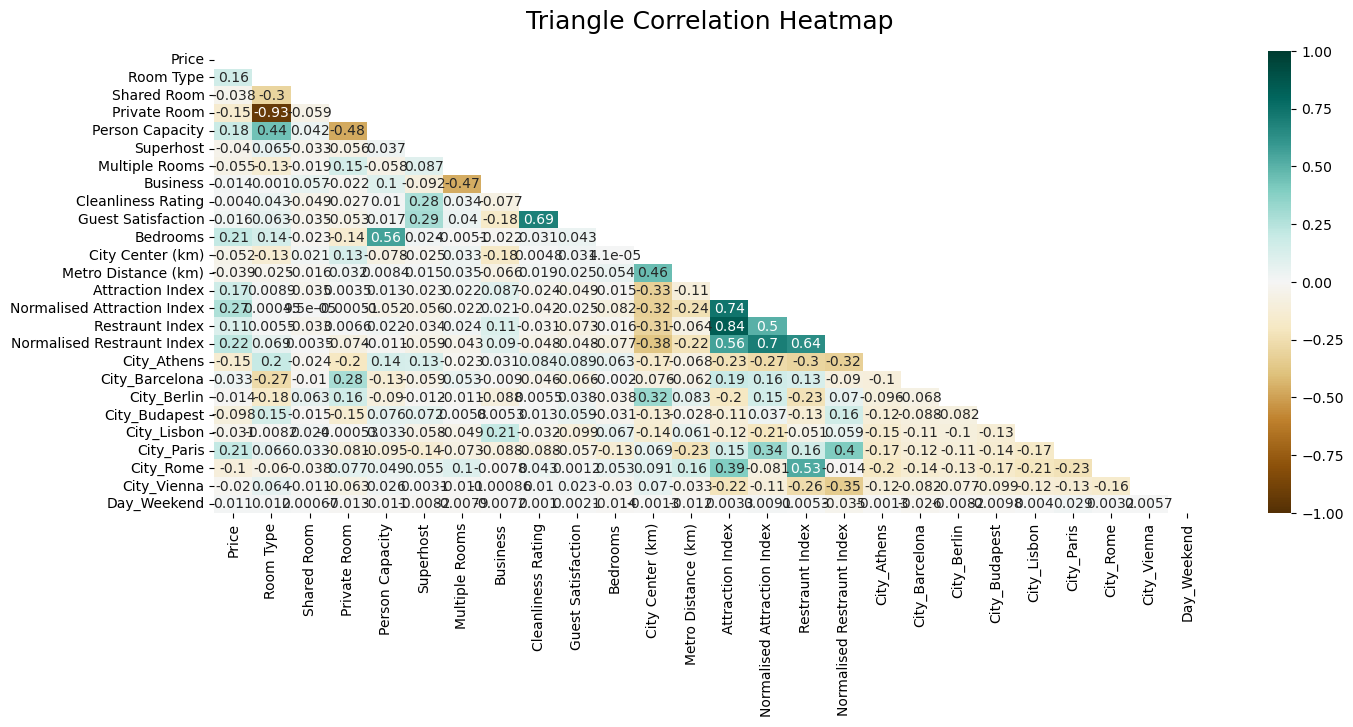

In [17]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df2.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [18]:
airbnb_df3 = airbnb_df2.drop(columns=['Attraction Index', 'Restraunt Index', 'Shared Room', 'Private Room'])

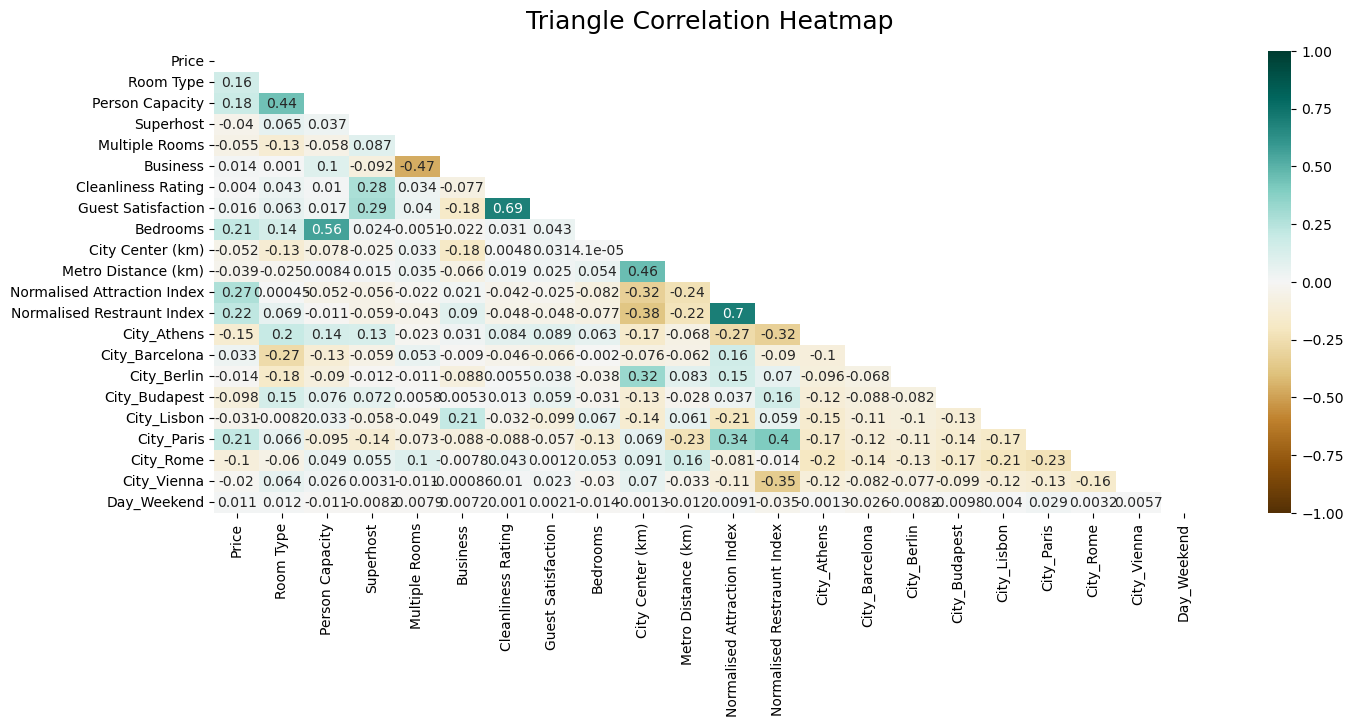

In [19]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df3.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df3.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [20]:
airbnb_df3['Bedrooms'][airbnb_df3['Bedrooms'] == 0].count()

3745

In [21]:
airbnb_df3.drop(airbnb_df3[airbnb_df3['Bedrooms'] == 0].index, inplace = True)

In [22]:
airbnb_df3['Bedrooms'][airbnb_df3['Bedrooms'] == 0].count()

0

In [23]:
airbnb_df3['Price'][airbnb_df3['Price'] > 1000].count()

469

In [24]:
airbnb_df3.drop(airbnb_df3[airbnb_df3['Bedrooms'] >6].index, inplace = True)

In [25]:
airbnb_df3.drop(airbnb_df3[airbnb_df3['Price'] >1000].index, inplace = True)

In [26]:
airbnb_df3

Price  Room Type  Person Capacity  Superhost  Multiple Rooms  \
0      194.033698        1.0              2.0        0.0             1.0   
1      344.245776        1.0              4.0        0.0             0.0   
2      264.101422        1.0              2.0        0.0             0.0   
3      433.529398        1.0              4.0        0.0             0.0   
4      485.552926        1.0              2.0        1.0             0.0   
...           ...        ...              ...        ...             ...   
41709  715.938574        2.0              6.0        0.0             0.0   
41710  304.793960        2.0              2.0        0.0             0.0   
41711  637.168969        2.0              2.0        0.0             0.0   
41712  301.054157        1.0              2.0        0.0             0.0   
41713  133.230489        1.0              4.0        1.0             1.0   

       Business  Cleanliness Rating  Guest Satisfaction  Bedrooms  \
0           0.0                10.0                93.0       1.0   
1           0.0                 8.0                85.0       1.0   
2           1.0                 9.0                87.0       1.0   
3           1.0                 9.0                90.0       2.0   
4           0.0                10.0                98.0       1.0   
...         ...                 ...                 ...       ...   
41709       1.0                10.0               100.0       3.0   
41710       0.0                 8.0                86.0       1.0   
41711       0.0                10.0                93.0       1.0   
41712       0.0                10.0                87.0       1.0   
41713       0.0                10.0                93.0       1.0   

       City Center (km)  ...  Normalised Restraunt Index  City_Athens  \
0              5.022964  ...                    6.846473            0   
1              0.488389  ...                   58.342928            0   
2              5.748312  ...                    6.646700            0   
3              0.384862  ...                   60.973565            0   
4              0.544738  ...                   56.811677            0   
...                 ...  ...                         ...          ...   
41709          0.530181  ...                   10.604584            0   
41710          0.810205  ...                    8.270427            0   
41711          0.994051  ...                    6.822996            0   
41712          3.044100  ...                    3.832416            0   
41713          1.263932  ...                    5.444140            0   

       City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  City_Paris  \
0                   0            0              0            0           0   
1                   0            0              0            0           0   
2                   0            0              0            0           0   
3                   0            0              0            0           0   
4                   0            0              0            0           0   
...               ...          ...            ...          ...         ...   
41709               0            0              0            0           0   
41710               0            0              0            0           0   
41711               0            0              0            0           0   
41712               0            0              0            0           0   
41713               0            0              0            0           0   

       City_Rome  City_Vienna  Day_Weekend  
0              0            0            0  
1              0            0            0  
2              0            0            0  
3              0            0            0  
4              0            0            0  
...          ...          ...          ...  
41709          0            1            1  
41710          0            1            1  
41711          0            1            1  
41712 

In [27]:
airbnb_df3.dropna()

Price  Room Type  Person Capacity  Superhost  Multiple Rooms  \
0      194.033698        1.0              2.0        0.0             1.0   
1      344.245776        1.0              4.0        0.0             0.0   
2      264.101422        1.0              2.0        0.0             0.0   
3      433.529398        1.0              4.0        0.0             0.0   
4      485.552926        1.0              2.0        1.0             0.0   
...           ...        ...              ...        ...             ...   
41709  715.938574        2.0              6.0        0.0             0.0   
41710  304.793960        2.0              2.0        0.0             0.0   
41711  637.168969        2.0              2.0        0.0             0.0   
41712  301.054157        1.0              2.0        0.0             0.0   
41713  133.230489        1.0              4.0        1.0             1.0   

       Business  Cleanliness Rating  Guest Satisfaction  Bedrooms  \
0           0.0                10.0                93.0       1.0   
1           0.0                 8.0                85.0       1.0   
2           1.0                 9.0                87.0       1.0   
3           1.0                 9.0                90.0       2.0   
4           0.0                10.0                98.0       1.0   
...         ...                 ...                 ...       ...   
41709       1.0                10.0               100.0       3.0   
41710       0.0                 8.0                86.0       1.0   
41711       0.0                10.0                93.0       1.0   
41712       0.0                10.0                87.0       1.0   
41713       0.0                10.0                93.0       1.0   

       City Center (km)  ...  Normalised Restraunt Index  City_Athens  \
0              5.022964  ...                    6.846473            0   
1              0.488389  ...                   58.342928            0   
2              5.748312  ...                    6.646700            0   
3              0.384862  ...                   60.973565            0   
4              0.544738  ...                   56.811677            0   
...                 ...  ...                         ...          ...   
41709          0.530181  ...                   10.604584            0   
41710          0.810205  ...                    8.270427            0   
41711          0.994051  ...                    6.822996            0   
41712          3.044100  ...                    3.832416            0   
41713          1.263932  ...                    5.444140            0   

       City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  City_Paris  \
0                   0            0              0            0           0   
1                   0            0              0            0           0   
2                   0            0              0            0           0   
3                   0            0              0            0           0   
4                   0            0              0            0           0   
...               ...          ...            ...          ...         ...   
41709               0            0              0            0           0   
41710               0            0              0            0           0   
41711               0            0              0            0           0   
41712               0            0              0            0           0   
41713               0            0              0            0           0   

       City_Rome  City_Vienna  Day_Weekend  
0              0            0            0  
1              0            0            0  
2              0            0            0  
3              0            0            0  
4              0            0            0  
...          ...          ...          ...  
41709          0            1            1  
41710          0            1            1  
41711          0            1            1  
41712 

In [28]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [29]:
X = airbnb_df3.drop('Price', axis=1)
y = airbnb_df3.Price

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

Room Type  Person Capacity  Superhost  Multiple Rooms  Business  \
17768        2.0              4.0        0.0             0.0       1.0   
1676         2.0              2.0        0.0             0.0       0.0   
11715        2.0              4.0        0.0             1.0       0.0   
6129         2.0              5.0        0.0             0.0       0.0   
38537        1.0              2.0        1.0             0.0       0.0   

       Cleanliness Rating  Guest Satisfaction  Bedrooms  City Center (km)  \
17768                 9.0                93.0       2.0          0.210135   
1676                  6.0                80.0       1.0          1.763036   
11715                 9.0                93.0       1.0          4.145561   
6129                 10.0                96.0       2.0          1.657024   
38537                10.0                98.0       1.0          2.173420   

       Metro Distance (km)  ...  Normalised Restraunt Index  City_Athens  \
17768             0.236493  ...                   64.780943            0   
1676              1.895290  ...                   24.315034            0   
11715             0.368196  ...                   37.137847            0   
6129              0.984947  ...                    1.961567            1   
38537             0.842006  ...                    3.407622            0   

       City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  City_Paris  \
17768               0            0              0            1           0   
1676                0            0              0            0           0   
11715               0            1              0            0           0   
6129                0            0              0            0           0   
38537               0            0              0            0           0   

       City_Rome  City_Vienna  Day_Weekend  
17768          0            0            0  
1676           0            0            1  
11715          0            0            1  
6129           0            0            1  
38537          0            1            0  

[5 rows x 21 columns]

In [31]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1835.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:35:47   Log-Likelihood:            -1.5691e+05
No. Observations:               26241   AIC:                         3.139e+05
Df Residuals:                   26219   BIC:                         3.140e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [32]:
airbnb_df4=airbnb_df3

In [33]:
airbnb_df4 = airbnb_df4.drop(columns=['Superhost','Normalised Restraunt Index'])

In [34]:
A = airbnb_df4.drop('Price', axis=1)
b = airbnb_df4.Price

In [35]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=TT_RATIO, random_state=RAND_STATE)
A_train = pd.DataFrame(A_train)
A_test = pd.DataFrame(A_test)
A_train.head()

Room Type  Person Capacity  Multiple Rooms  Business  \
17768        2.0              4.0             0.0       1.0   
1676         2.0              2.0             0.0       0.0   
11715        2.0              4.0             1.0       0.0   
6129         2.0              5.0             0.0       0.0   
38537        1.0              2.0             0.0       0.0   

       Cleanliness Rating  Guest Satisfaction  Bedrooms  City Center (km)  \
17768                 9.0                93.0       2.0          0.210135   
1676                  6.0                80.0       1.0          1.763036   
11715                 9.0                93.0       1.0          4.145561   
6129                 10.0                96.0       2.0          1.657024   
38537                10.0                98.0       1.0          2.173420   

       Metro Distance (km)  Normalised Attraction Index  City_Athens  \
17768             0.236493                    18.771658            0   
1676              1.895290                    11.415862            0   
11715             0.368196                    19.205809            0   
6129              0.984947                     3.842144            1   
38537             0.842006                     6.772945            0   

       City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  City_Paris  \
17768               0            0              0            1           0   
1676                0            0              0            0           0   
11715               0            1              0            0           0   
6129                0            0              0            0           0   
38537               0            0              0            0           0   

       City_Rome  City_Vienna  Day_Weekend  
17768          0            0            0  
1676           0            0            1  
11715          0            0            1  
6129           0            0            1  
38537          0            1            0

In [36]:
A_train_const = sm.add_constant(A_train) # adding a constant

model = sm.OLS(b_train, A_train_const).fit()
predictions_train = model.predict(A_train_const)

A_test_const = sm.add_constant(A_test) # adding a constant
predictions_test = model.predict(A_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2005.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:35:53   Log-Likelihood:            -1.5700e+05
No. Observations:               26241   AIC:                         3.140e+05
Df Residuals:                   26221   BIC:                         3.142e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

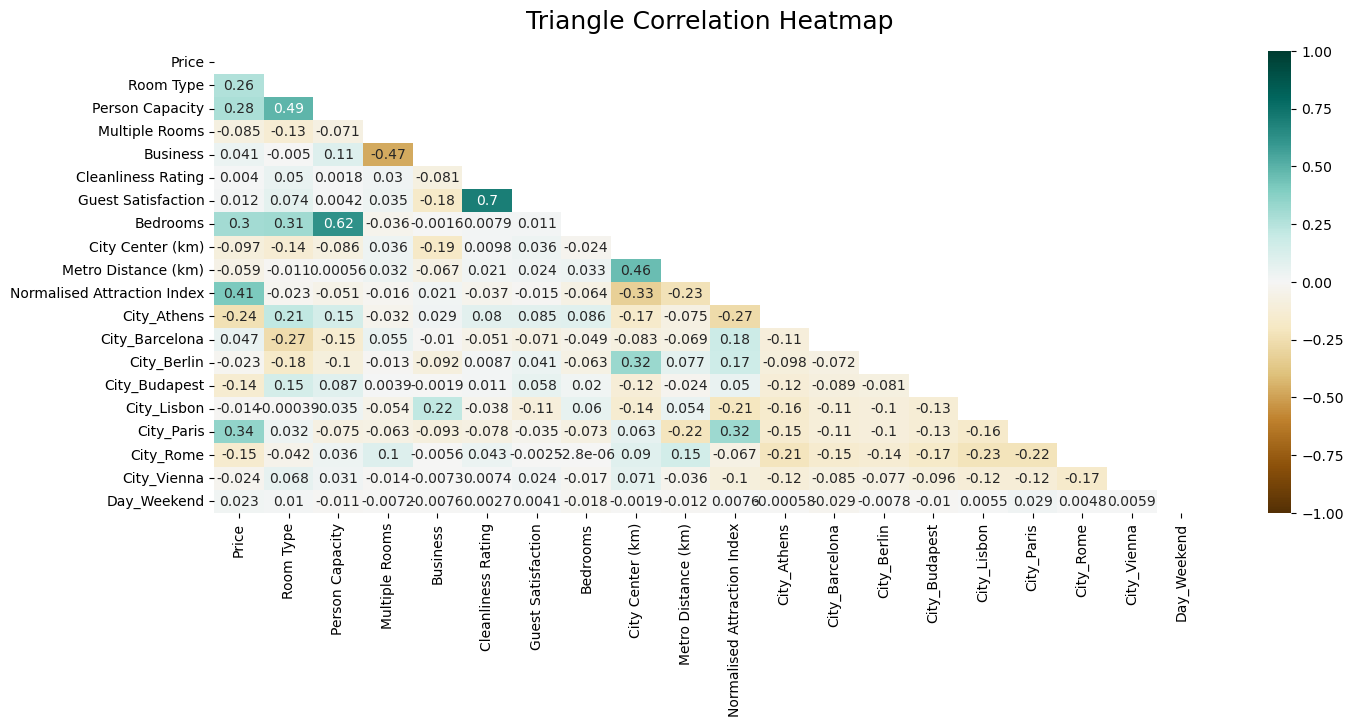

In [37]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df4.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df4.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [38]:
airbnb_df5 = airbnb_df4.drop(columns=['Guest Satisfaction','Person Capacity'])

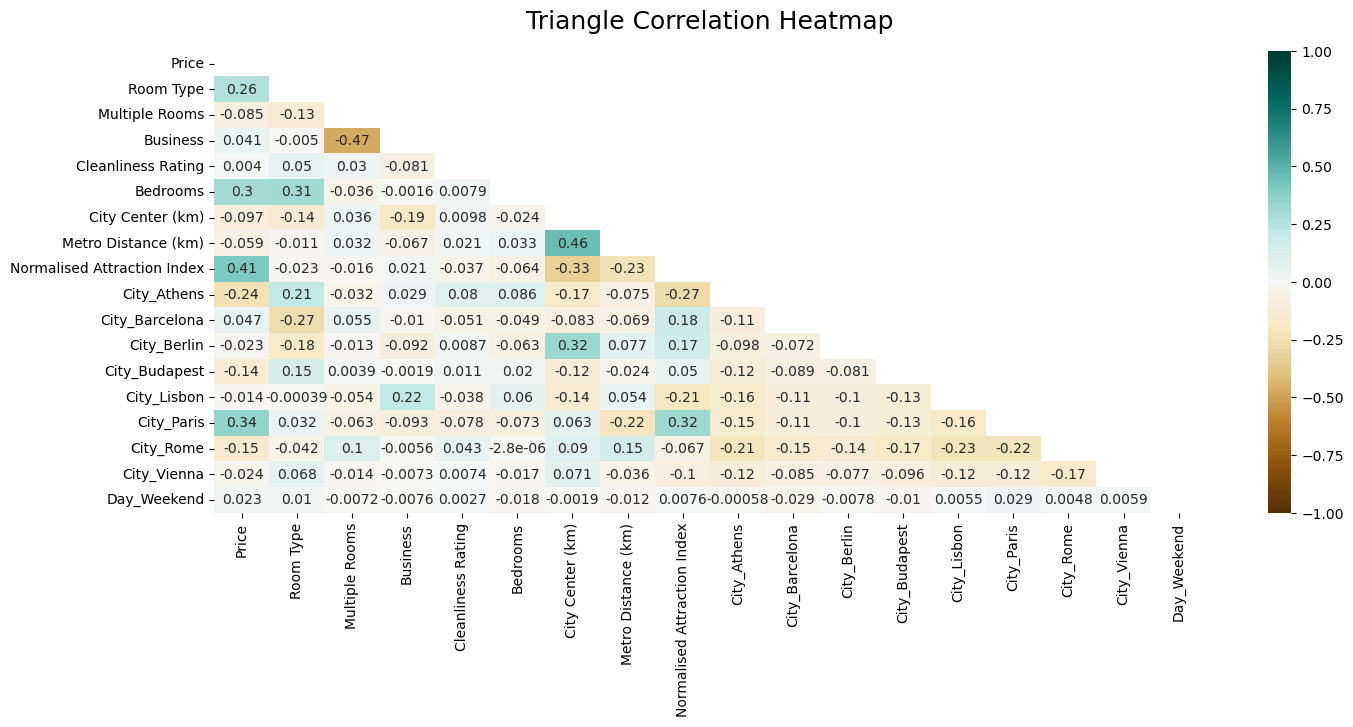

In [40]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df5.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df5.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

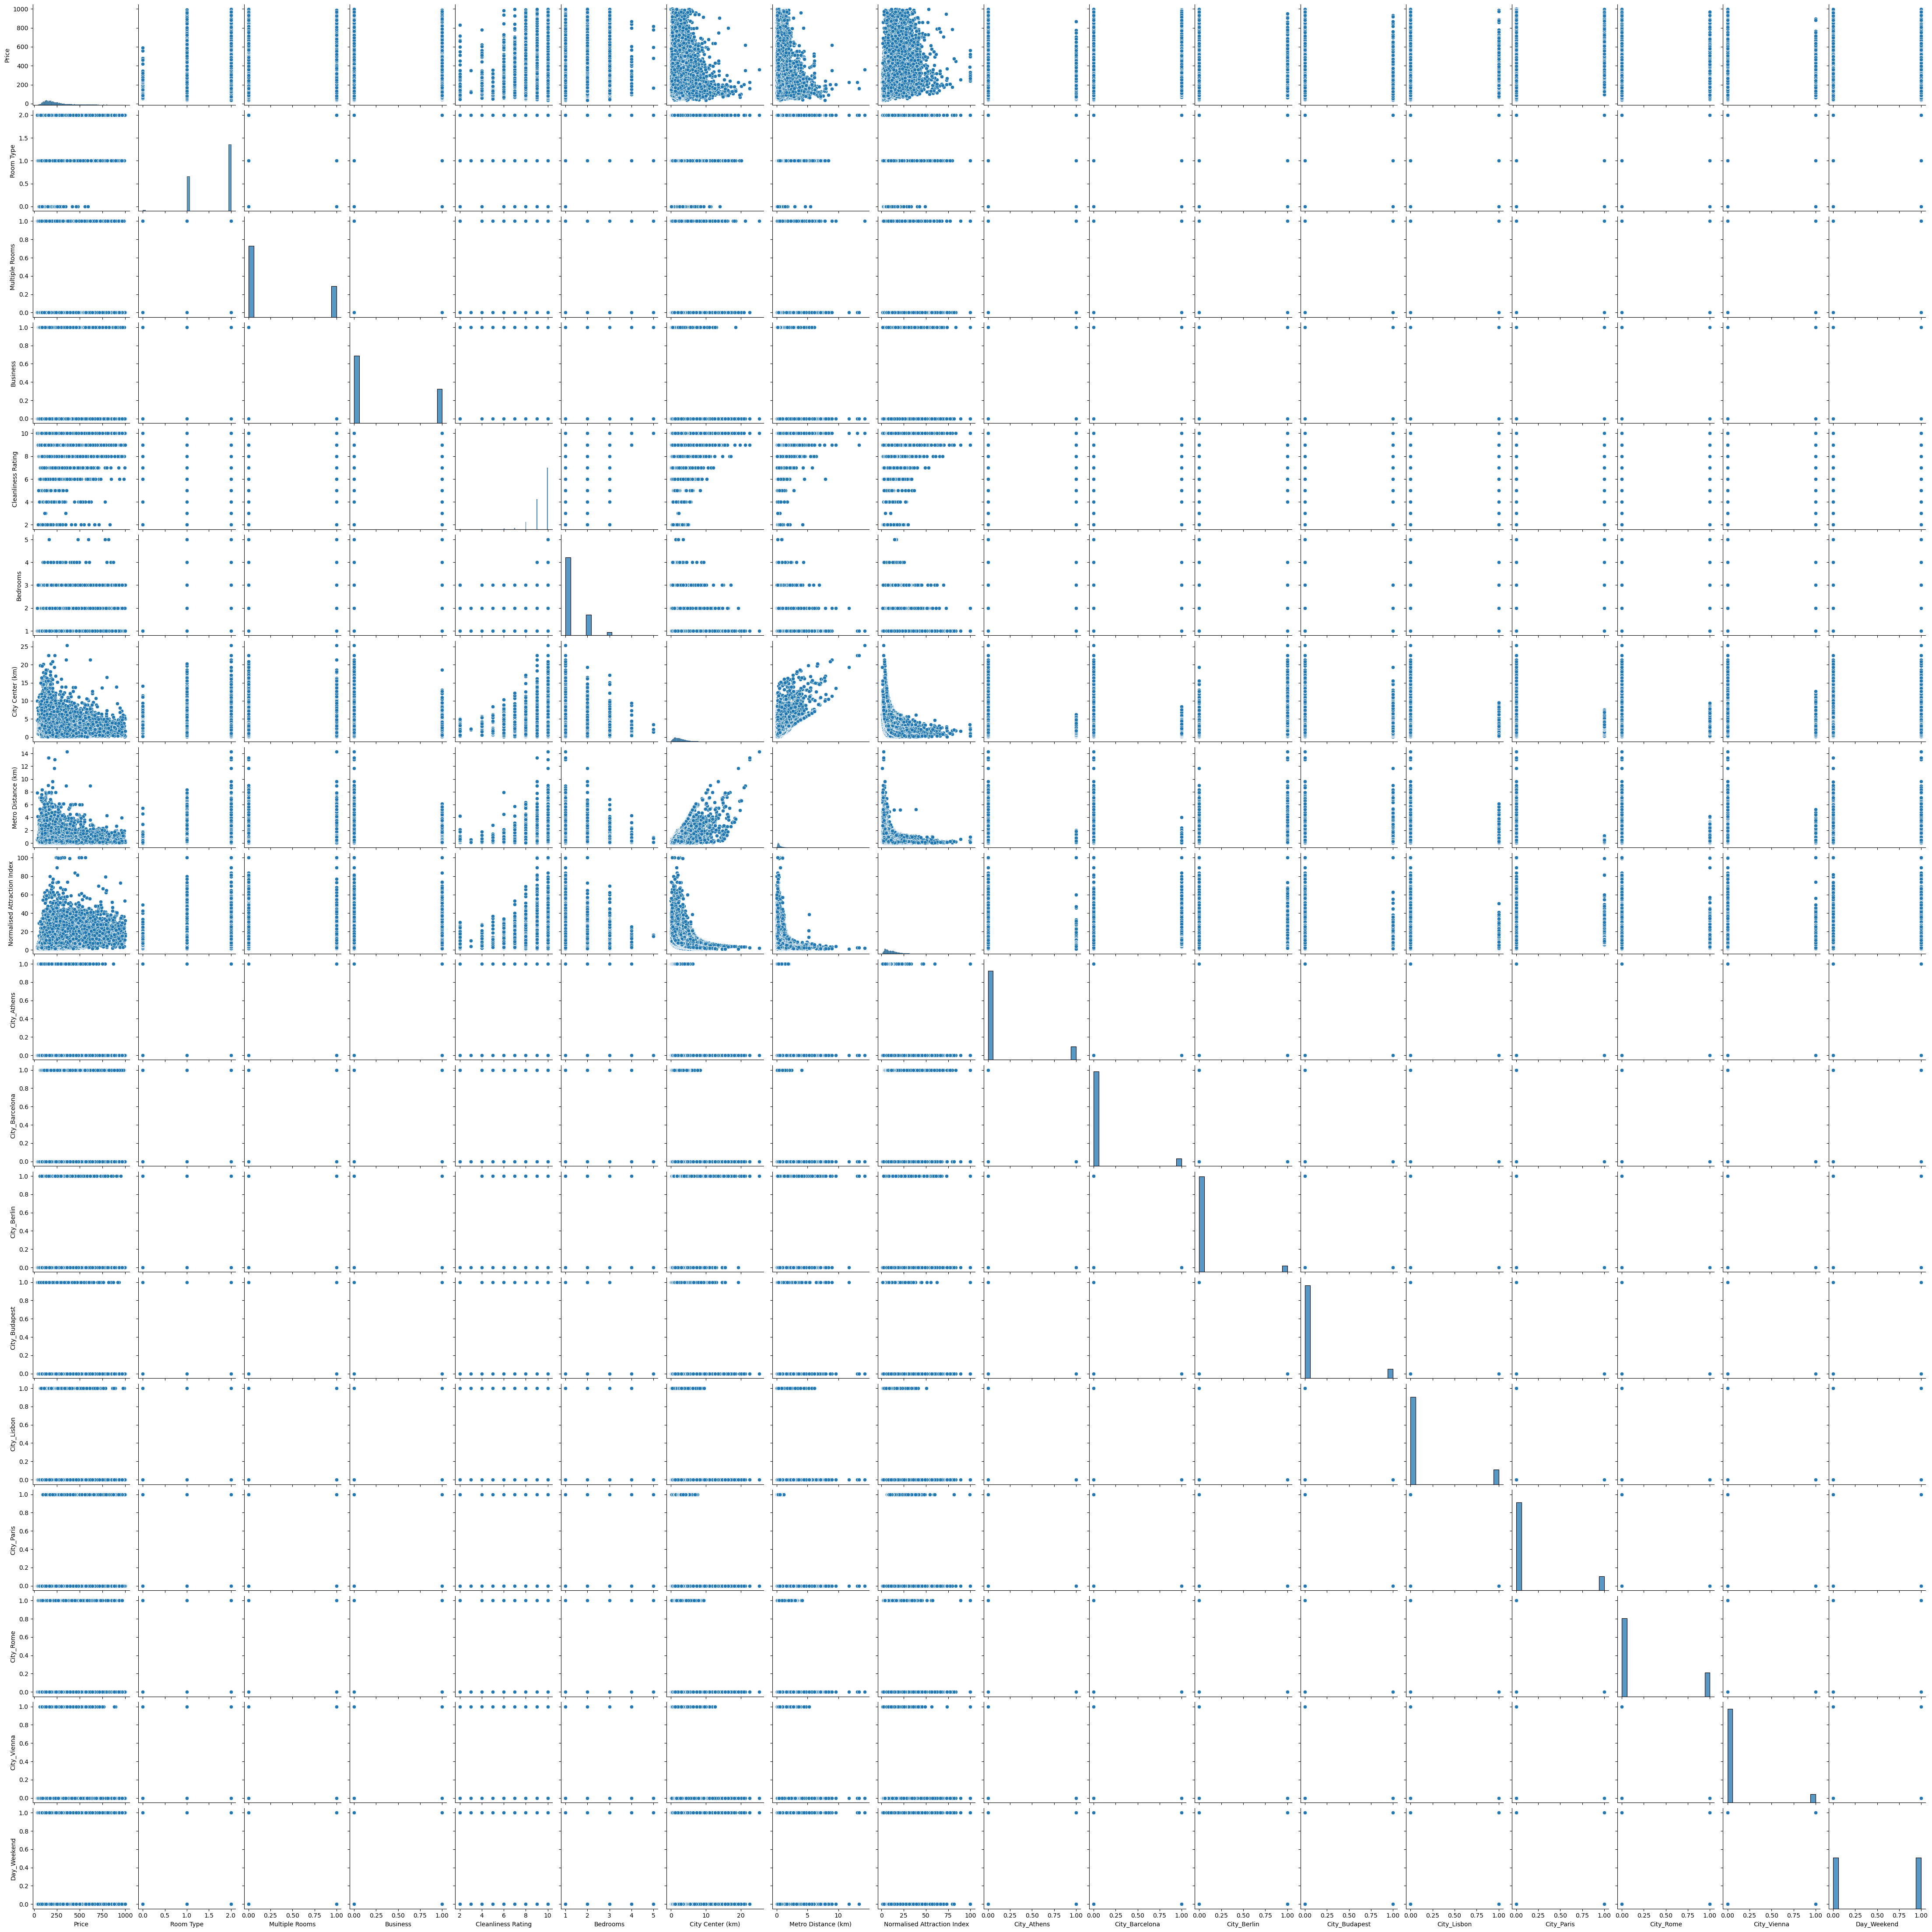

In [41]:
sns.pairplot(airbnb_df5.select_dtypes(np.number))

In [42]:
airbnb_df5['City Center (km)'][airbnb_df5['City Center (km)'] > 20].count()

11

In [ ]:
airbnb_df5.drop(airbnb_df5[airbnb_df5['City Center (km)'] >20].index, inplace = True)

In [45]:
airbnb_df5.drop(airbnb_df5[airbnb_df5['Metro Distance (km)'] >10].index, inplace = True)

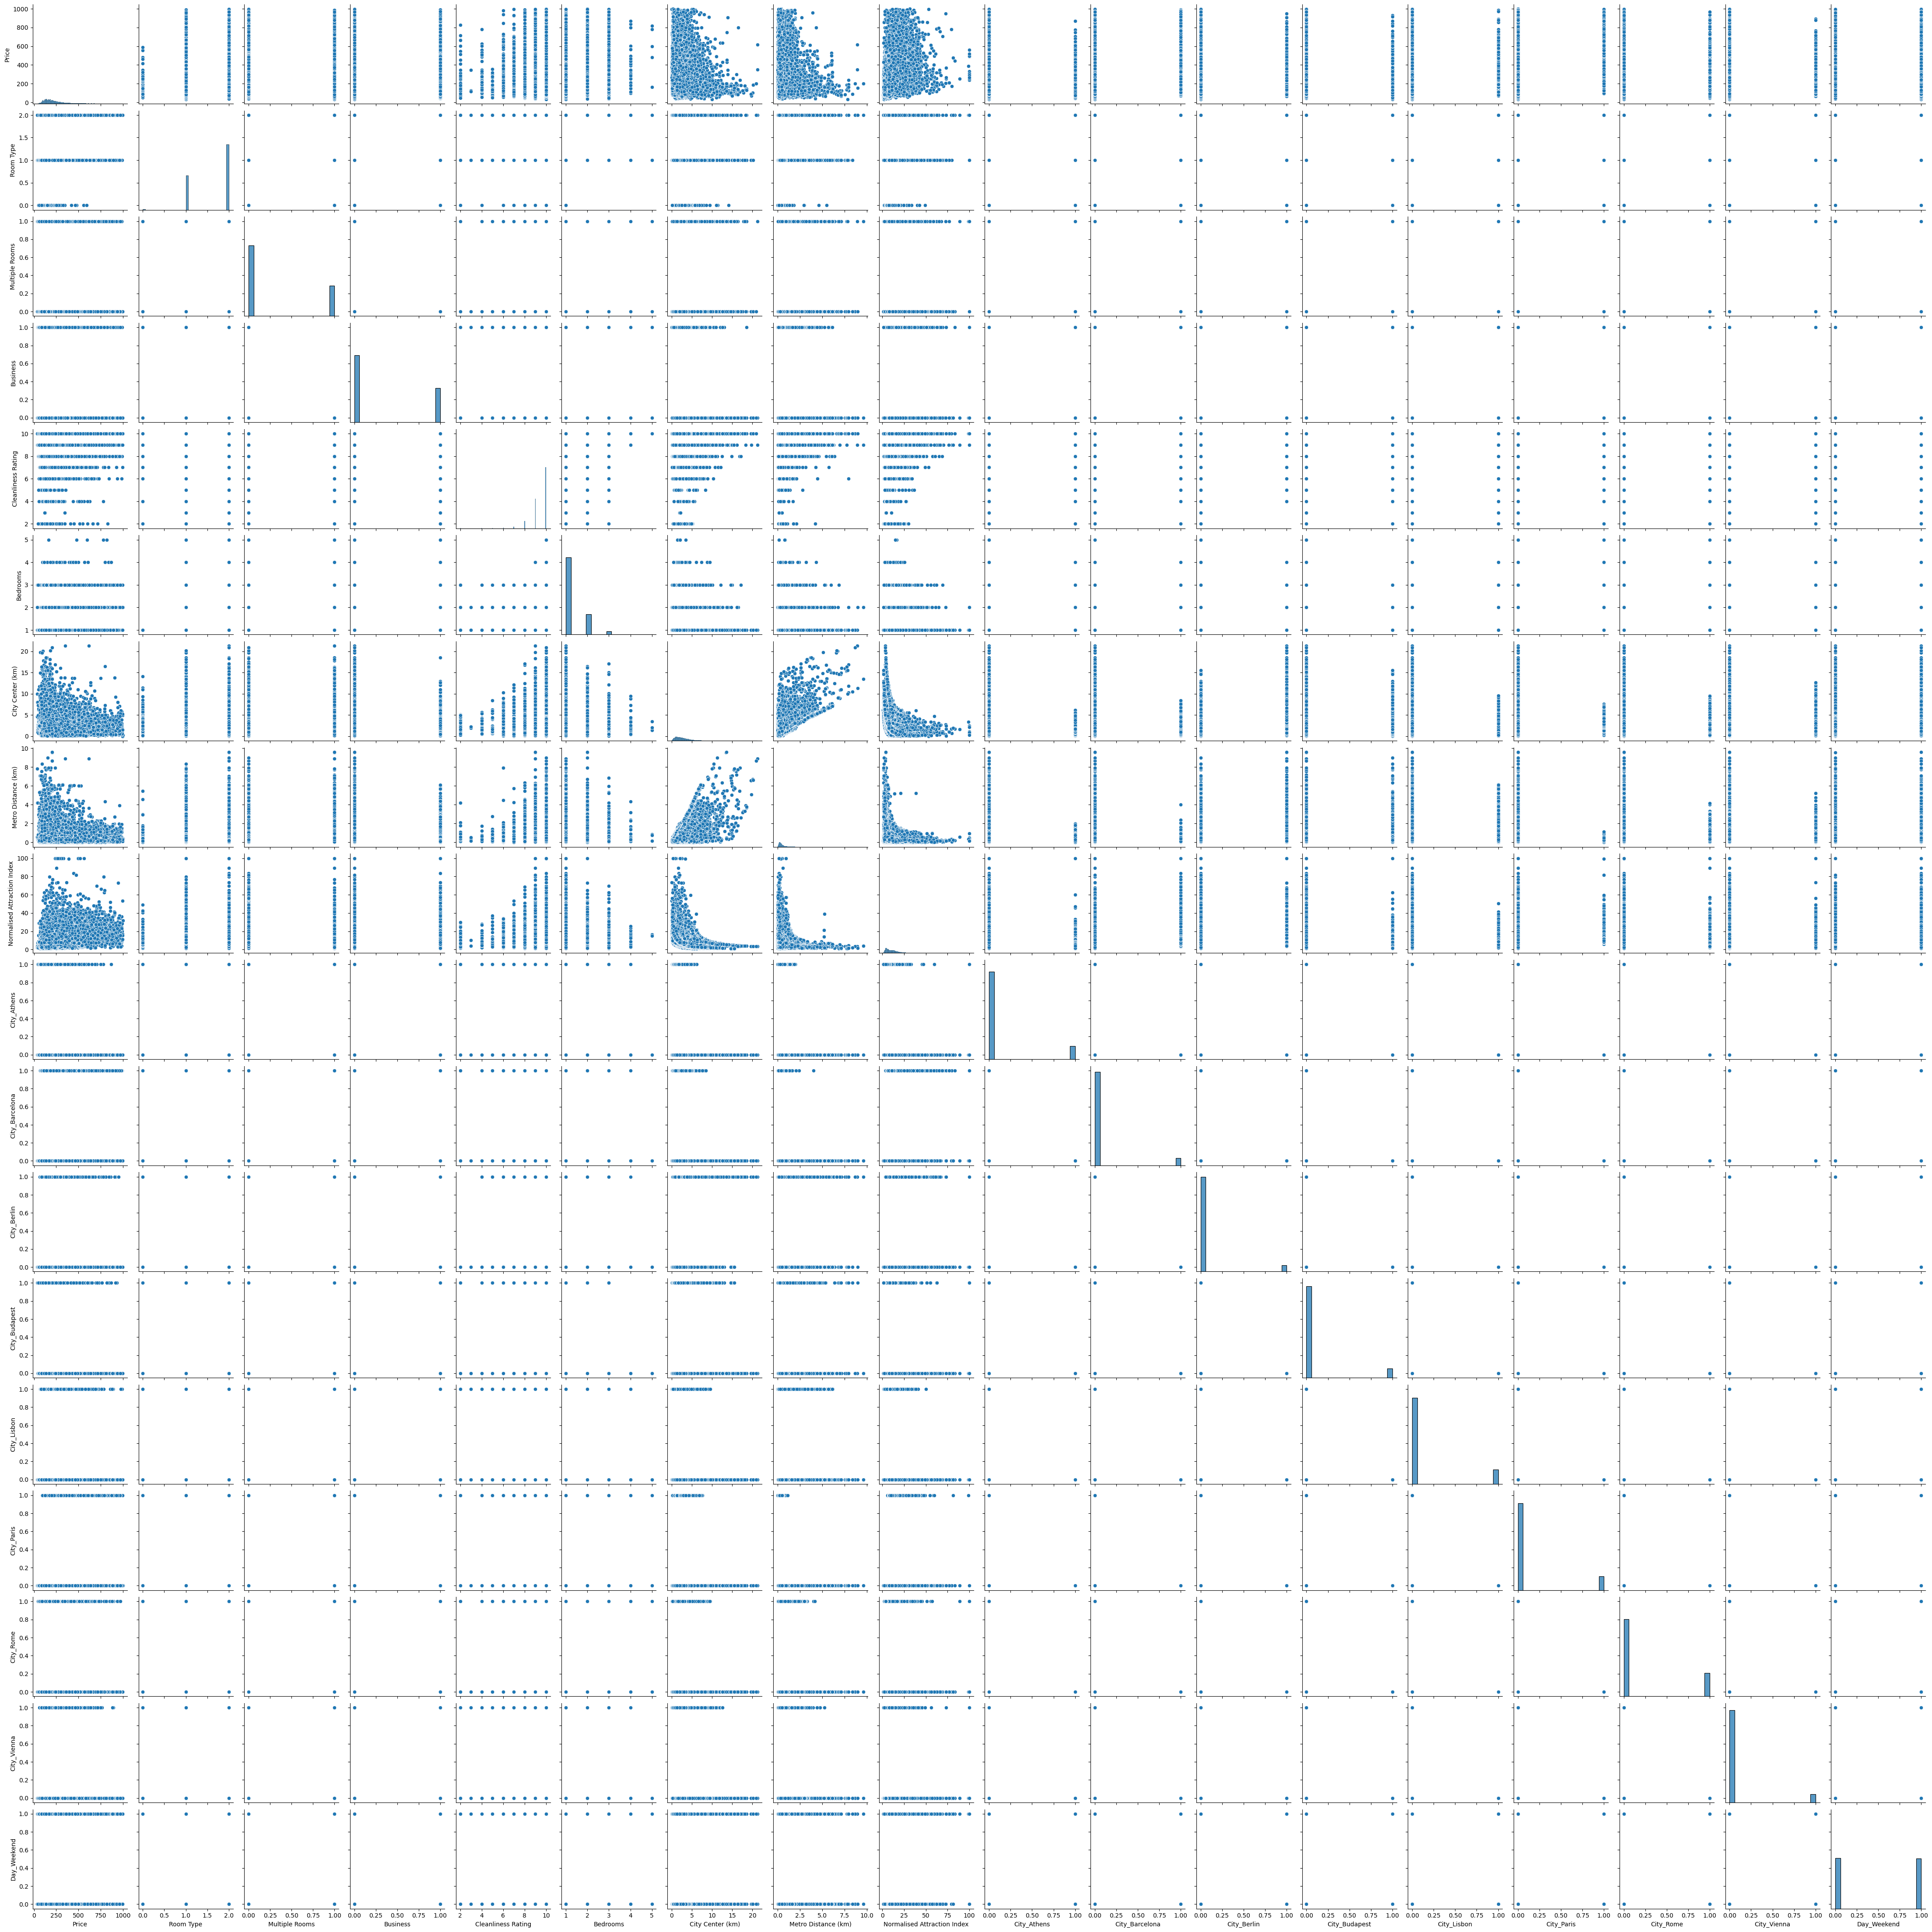

In [46]:
sns.pairplot(airbnb_df5.select_dtypes(np.number))

In [47]:
C = airbnb_df5.drop('Price', axis=1)
d = airbnb_df5.Price

In [48]:
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=TT_RATIO, random_state=RAND_STATE)
C_train = pd.DataFrame(C_train)
C_test = pd.DataFrame(C_test)
C_train.head()

Room Type  Multiple Rooms  Business  Cleanliness Rating  Bedrooms  \
31204        1.0             0.0       1.0                10.0       1.0   
30504        1.0             1.0       0.0                10.0       1.0   
2501         1.0             1.0       0.0                10.0       1.0   
39920        2.0             1.0       0.0                10.0       1.0   
982          1.0             0.0       0.0                10.0       1.0   

       City Center (km)  Metro Distance (km)  Normalised Attraction Index  \
31204          2.374635             1.440867                    18.365482   
30504          4.742671             0.219420                     8.009219   
2501           3.754778             0.252213                     1.738198   
39920          2.011143             0.679081                    10.408947   
982            1.939911             1.920139                    12.230202   

       City_Athens  City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  \
31204            0               0            0              0            0   
30504            0               0            0              0            0   
2501             1               0            0              0            0   
39920            0               0            0              0            0   
982              0               0            0              0            0   

       City_Paris  City_Rome  City_Vienna  Day_Weekend  
31204           0          1            0            0  
30504           0          1            0            0  
2501            0          0            0            0  
39920           0          0            1            1  
982             0          0            0            0

In [49]:
C_train_const = sm.add_constant(C_train) # adding a constant

model = sm.OLS(d_train, C_train_const).fit()
predictions_train = model.predict(C_train_const)

C_test_const = sm.add_constant(C_test) # adding a constant
predictions_test = model.predict(C_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2077.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:19:22   Log-Likelihood:            -1.5768e+05
No. Observations:               26238   AIC:                         3.154e+05
Df Residuals:                   26220   BIC:                         3.155e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [50]:
airbnb_df6 = airbnb_df5

In [53]:
E = airbnb_df6.drop('Price', axis=1)
f = airbnb_df6.Price

In [54]:
E_train, E_test, f_train, f_test = train_test_split(E, f, test_size=TT_RATIO, random_state=RAND_STATE)
E_train = pd.DataFrame(E_train)
E_test = pd.DataFrame(E_test)
E_train.head()

Room Type  Multiple Rooms  Business  Cleanliness Rating  Bedrooms  \
31204        1.0             0.0       1.0                10.0       1.0   
30504        1.0             1.0       0.0                10.0       1.0   
2501         1.0             1.0       0.0                10.0       1.0   
39920        2.0             1.0       0.0                10.0       1.0   
982          1.0             0.0       0.0                10.0       1.0   

       City Center (km)  Metro Distance (km)  Normalised Attraction Index  \
31204          2.374635             1.440867                    18.365482   
30504          4.742671             0.219420                     8.009219   
2501           3.754778             0.252213                     1.738198   
39920          2.011143             0.679081                    10.408947   
982            1.939911             1.920139                    12.230202   

       City_Athens  City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  \
31204            0               0            0              0            0   
30504            0               0            0              0            0   
2501             1               0            0              0            0   
39920            0               0            0              0            0   
982              0               0            0              0            0   

       City_Paris  City_Rome  City_Vienna  Day_Weekend  
31204           0          1            0            0  
30504           0          1            0            0  
2501            0          0            0            0  
39920           0          0            1            1  
982             0          0            0            0

In [51]:
pt = PowerTransformer()

In [55]:
E_train_pt = pt.fit_transform(E_train)
E_test_pt = pt.transform(E_test)

In [56]:
E_train_pt_const = sm.add_constant(E_train_pt) # adding a constant

model = sm.OLS(f_train, E_train_pt_const).fit()
predictions_train = model.predict(E_train_pt_const)

E_test_pt_const = sm.add_constant(E_test_pt) # adding a constant
predictions_test = model.predict(E_test_pt_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2017.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:39:24   Log-Likelihood:            -1.5790e+05
No. Observations:               26238   AIC:                         3.158e+05
Df Residuals:                   26220   BIC:                         3.160e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.8714      0.614    397.336      0.0

In [61]:
airbnb_df7 = airbnb_df5

In [63]:
G = airbnb_df7.drop('Price', axis=1)
h = airbnb_df7.Price

In [64]:
G_train, G_test, h_train, h_test = train_test_split(G, h, test_size=TT_RATIO, random_state=RAND_STATE)
G_train = pd.DataFrame(G_train)
G_test = pd.DataFrame(G_test)
G_train.head()

Room Type  Multiple Rooms  Business  Cleanliness Rating  Bedrooms  \
31204        1.0             0.0       1.0                10.0       1.0   
30504        1.0             1.0       0.0                10.0       1.0   
2501         1.0             1.0       0.0                10.0       1.0   
39920        2.0             1.0       0.0                10.0       1.0   
982          1.0             0.0       0.0                10.0       1.0   

       City Center (km)  Metro Distance (km)  Normalised Attraction Index  \
31204          2.374635             1.440867                    18.365482   
30504          4.742671             0.219420                     8.009219   
2501           3.754778             0.252213                     1.738198   
39920          2.011143             0.679081                    10.408947   
982            1.939911             1.920139                    12.230202   

       City_Athens  City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  \
31204            0               0            0              0            0   
30504            0               0            0              0            0   
2501             1               0            0              0            0   
39920            0               0            0              0            0   
982              0               0            0              0            0   

       City_Paris  City_Rome  City_Vienna  Day_Weekend  
31204           0          1            0            0  
30504           0          1            0            0  
2501            0          0            0            0  
39920           0          0            1            1  
982             0          0            0            0

In [65]:
scaler = StandardScaler()
G_train_scaled = scaler.fit_transform(G_train)
G_test_scaled = scaler.transform(G_test)

In [66]:
G_train_const_scaled = sm.add_constant(G_train_scaled) # adding a constant

model = sm.OLS(h_train, G_train_const_scaled).fit()
predictions_train = model.predict(G_train_const_scaled)

G_test_const_scaled = sm.add_constant(G_test_scaled) # adding a constant
predictions_test = model.predict(G_test_const_scaled)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2077.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:50:28   Log-Likelihood:            -1.5768e+05
No. Observations:               26238   AIC:                         3.154e+05
Df Residuals:                   26220   BIC:                         3.155e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.8714      0.609    400.655      0.0

In [67]:
airbnb_df7 = airbnb_df5

In [87]:
airbnb_df7.drop(airbnb_df7[airbnb_df7['City Center (km)'] >10].index, inplace = True)
airbnb_df7.drop(airbnb_df7[airbnb_df7['Normalised Attraction Index'] >80].index, inplace = True)
airbnb_df7 = airbnb_df7.drop(columns=['Metro Distance (km)'])

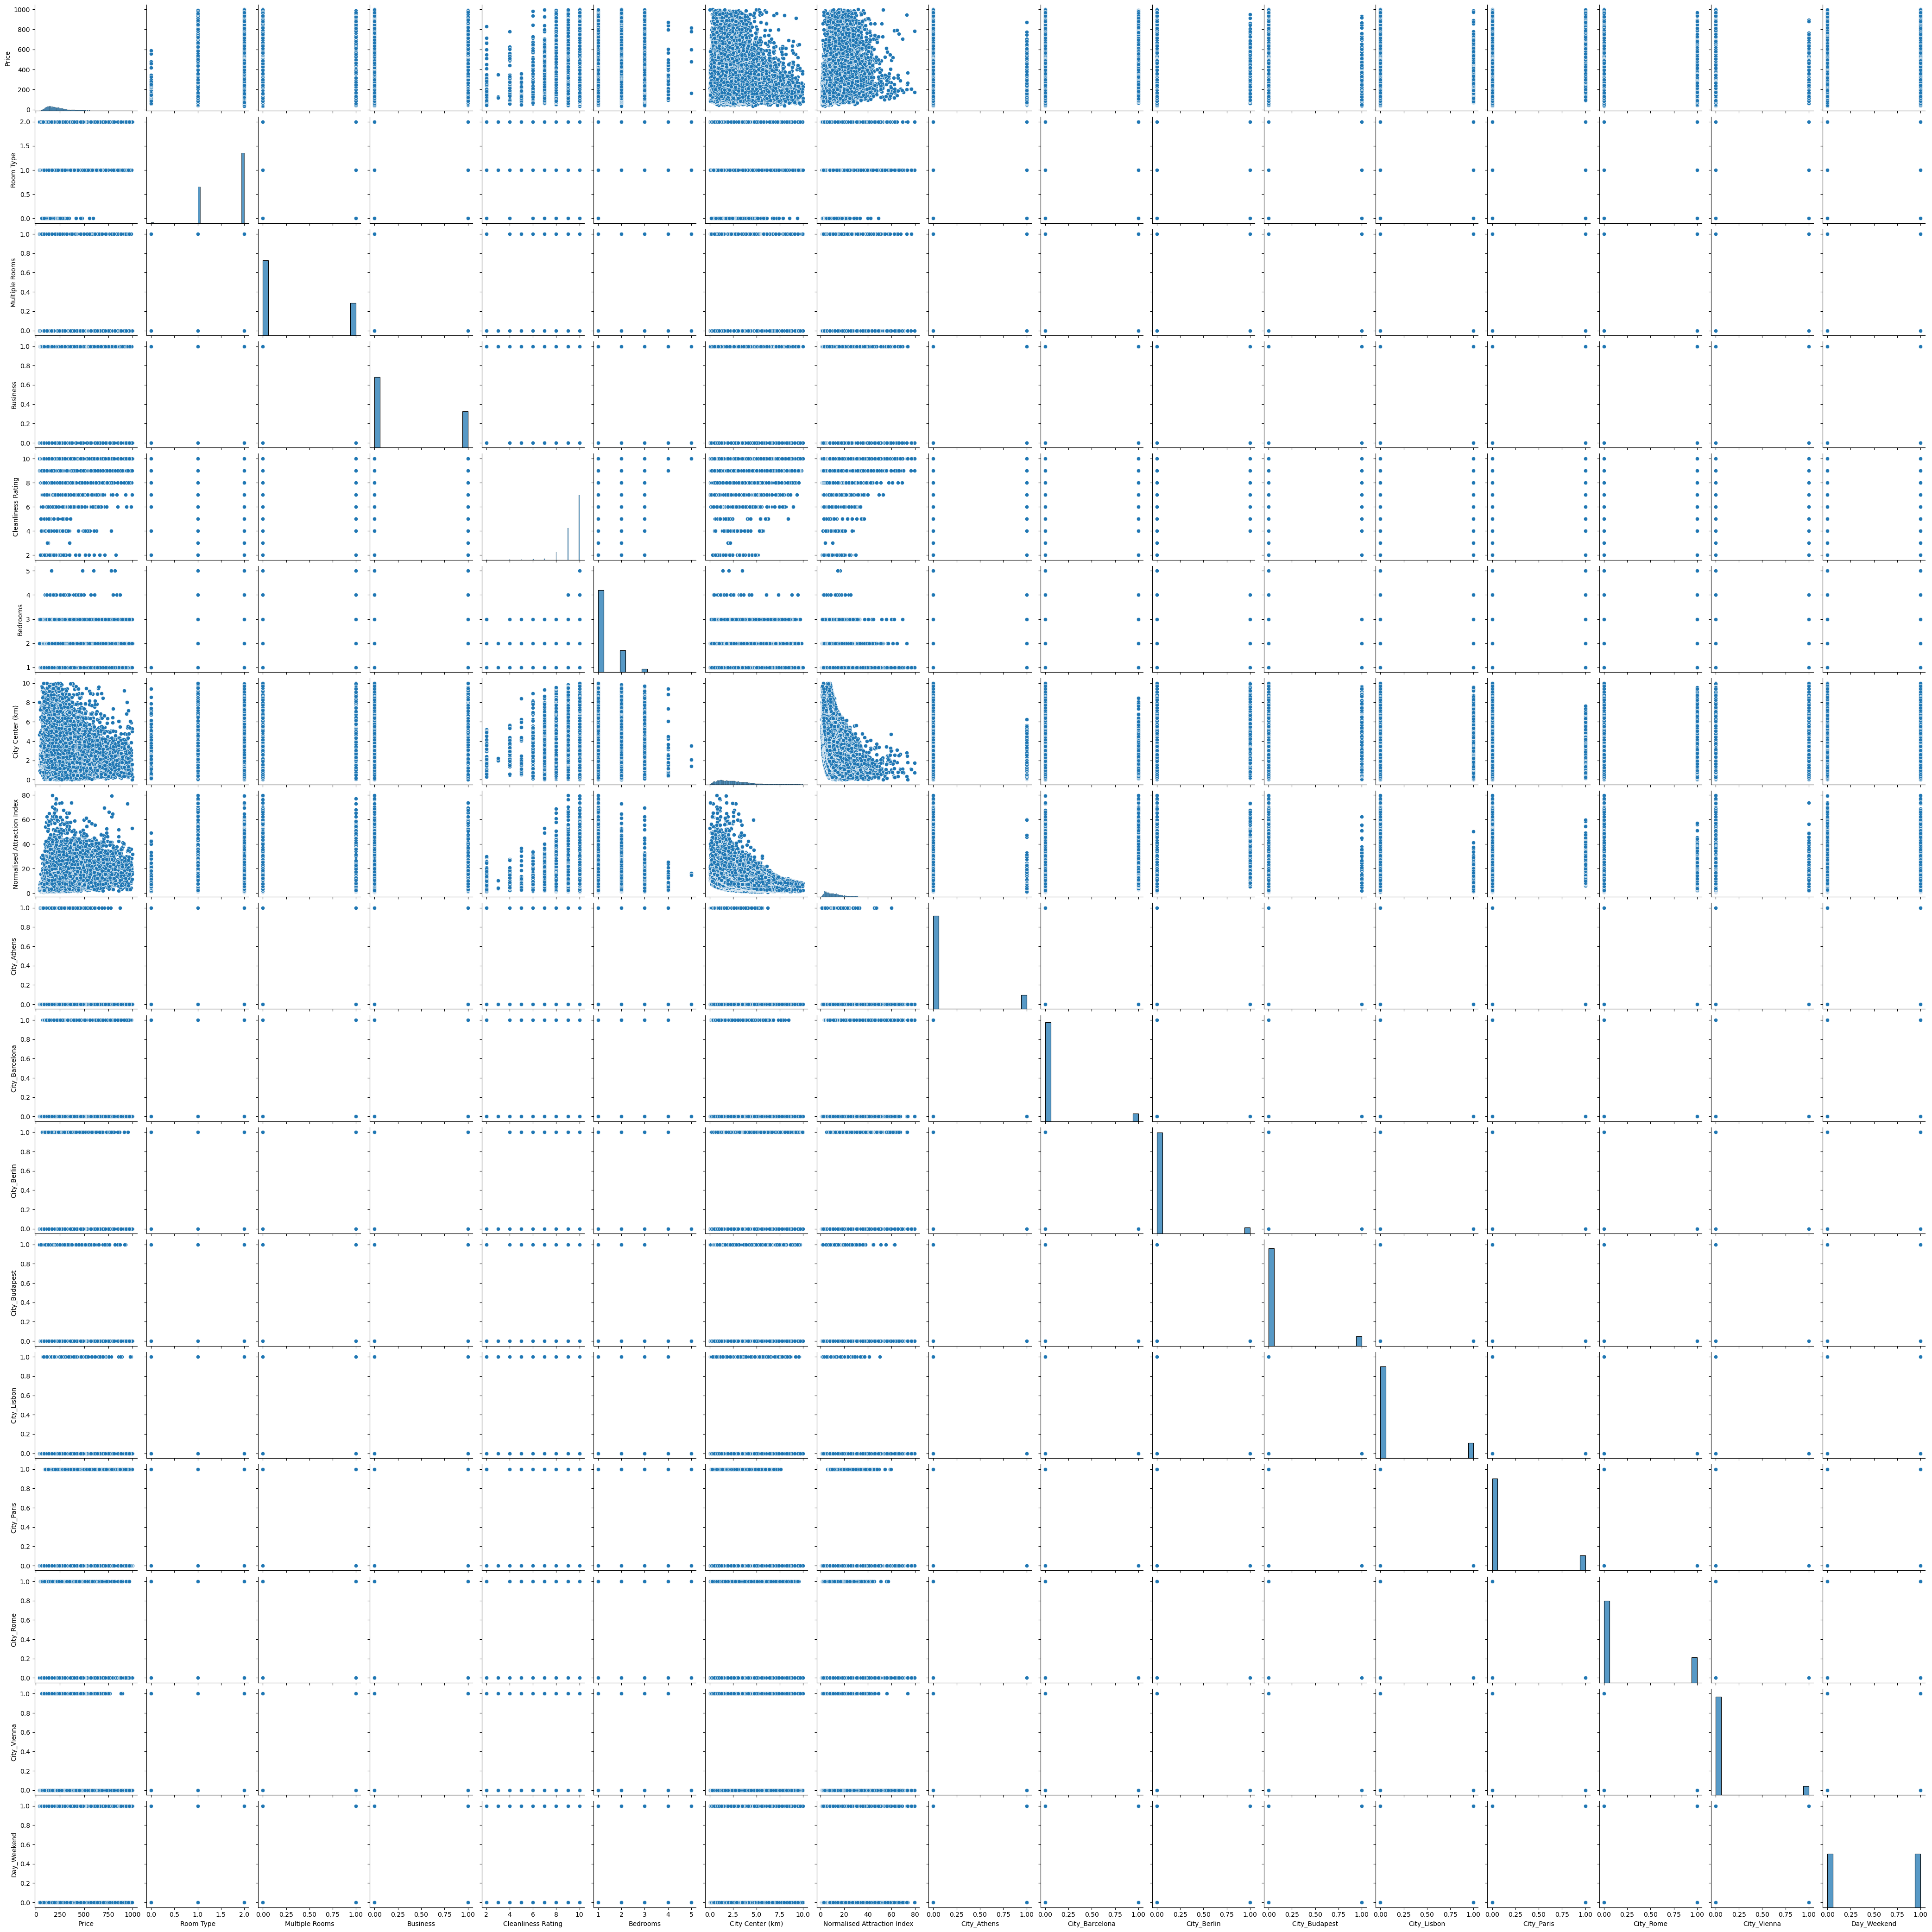

In [92]:
sns.pairplot(airbnb_df7.select_dtypes(np.number))

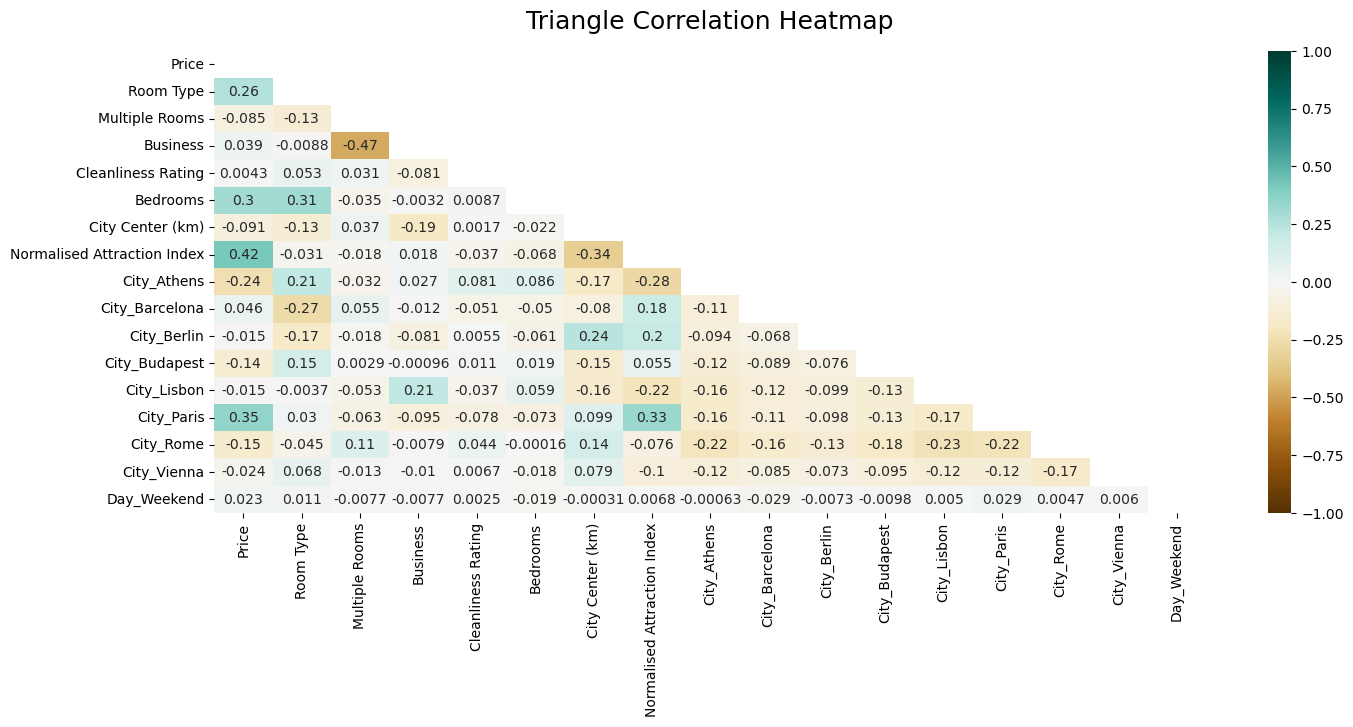

In [88]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df7.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df7.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [89]:
J = airbnb_df7.drop('Price', axis=1)
k = airbnb_df7.Price

In [90]:
J_train, J_test, k_train, k_test = train_test_split(J, k, test_size=TT_RATIO, random_state=RAND_STATE)
J_train = pd.DataFrame(J_train)
J_test = pd.DataFrame(J_test)
J_train.head()

Room Type  Multiple Rooms  Business  Cleanliness Rating  Bedrooms  \
31082        2.0             1.0       0.0                10.0       3.0   
26067        2.0             0.0       1.0                10.0       1.0   
3153         2.0             0.0       1.0                10.0       1.0   
8247         1.0             1.0       0.0                10.0       3.0   
26754        2.0             0.0       0.0                 7.0       1.0   

       City Center (km)  Normalised Attraction Index  City_Athens  \
31082          1.604753                    24.990753            0   
26067          1.890975                    58.694261            0   
3153           1.307558                     4.053127            1   
8247           1.629946                    11.326016            0   
26754          4.263675                    23.572021            0   

       City_Barcelona  City_Berlin  City_Budapest  City_Lisbon  City_Paris  \
31082               0            0              0            0           0   
26067               0            0              0            0           1   
3153                0            0              0            0           0   
8247                1            0              0            0           0   
26754               0            0              0            0           1   

       City_Rome  City_Vienna  Day_Weekend  
31082          1            0            0  
26067          0            0            1  
3153           0            0            0  
8247           0            0            0  
26754          0            0            1

In [91]:
J_train_const = sm.add_constant(J_train) # adding a constant

model = sm.OLS(k_train, J_train_const).fit()
predictions_train = model.predict(J_train_const)

J_test_const = sm.add_constant(J_test) # adding a constant
predictions_test = model.predict(J_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     2243.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:17:30   Log-Likelihood:            -1.5591e+05
No. Observations:               25935   AIC:                         3.119e+05
Df Residuals:                   25918   BIC:                         3.120e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [94]:
airbnb_df8 = airbnb_df7.drop(columns=['City_Barcelona','City_Athens','City_Budapest','City_Lisbon','City_Vienna'])

In [96]:
L = airbnb_df8.drop('Price', axis=1)
m = airbnb_df8.Price

In [97]:
L_train, L_test, m_train, m_test = train_test_split(L, m, test_size=TT_RATIO, random_state=RAND_STATE)
L_train = pd.DataFrame(L_train)
L_test = pd.DataFrame(L_test)
L_train.head()

Room Type  Multiple Rooms  Business  Cleanliness Rating  Bedrooms  \
31082        2.0             1.0       0.0                10.0       3.0   
26067        2.0             0.0       1.0                10.0       1.0   
3153         2.0             0.0       1.0                10.0       1.0   
8247         1.0             1.0       0.0                10.0       3.0   
26754        2.0             0.0       0.0                 7.0       1.0   

       City Center (km)  Normalised Attraction Index  City_Berlin  City_Paris  \
31082          1.604753                    24.990753            0           0   
26067          1.890975                    58.694261            0           1   
3153           1.307558                     4.053127            0           0   
8247           1.629946                    11.326016            0           0   
26754          4.263675                    23.572021            0           1   

       City_Rome  Day_Weekend  
31082          1            0  
26067          0            1  
3153           0            0  
8247           0            0  
26754          0            1

In [98]:
L_train_const = sm.add_constant(L_train) # adding a constant

model = sm.OLS(m_train, L_train_const).fit()
predictions_train = model.predict(L_train_const)

L_test_const = sm.add_constant(L_test) # adding a constant
predictions_test = model.predict(L_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     1497.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:23:24   Log-Likelihood:            -1.6081e+05
No. Observations:               25935   AIC:                         3.216e+05
Df Residuals:                   25923   BIC:                         3.217e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             